# Tracking German election polling surveys
> Polling surveys of German parties with data aggregated daily from different opinion research centers

- comments: true
- author: Caglar Cakan
- categories: [data]
- permalink: /polling-data/
- image: images/icon_afd.png
- license: Creative Commons

The data for this script is pulled from https://www.wahlrecht.de/umfragen. Below the code, you can find the output figures.

In [1]:
#hide
#plt.style.use("light")

In [2]:
#hide_input
import datetime
from IPython.display import display, Markdown, Latex
display(Markdown(f'<p>This page was last built on {datetime.datetime.now().strftime("%d.%m.%y %H:%M:%S")}</p>'))
#print("This page was last built on", datetime.datetime.now().strftime("%d.%m.%y %H:%M:%S"))

<p>This page was last built on 13.03.21 01:54:10</p>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d

table_urls = ["https://www.wahlrecht.de/umfragen/allensbach.htm",
              "https://www.wahlrecht.de/umfragen/emnid.htm",
              "https://www.wahlrecht.de/umfragen/forsa.htm",
              "https://www.wahlrecht.de/umfragen/politbarometer.htm",
              "https://www.wahlrecht.de/umfragen/gms.htm",
              "https://www.wahlrecht.de/umfragen/dimap.htm",
              "https://www.wahlrecht.de/umfragen/yougov.htm",
              #"https://www.wahlrecht.de/umfragen/insa.htm" # broken data
             ]
names = ["Allensbach", "Kantar", "Forsa" "Forsch’gr. Wahlen", "GMS", "Infratest", "dimap", "Yougov", "INSA"]

# get the election results
election_results = pd.read_html("https://www.wahlrecht.de/umfragen/")[1]
election_results["percent"] = election_results["Bundes-tagswahl"].iloc[1:].str.replace(',', '.').str.rstrip('%').astype('float')
election_results = election_results.set_index("Institut")

# get polling results

party_to_watch = "AfD"

def get_party_results(party_to_watch = "AfD"):
    print(f"---------- {party_to_watch} ----------")
    plt.figure(figsize=(5, 3), dpi=300)
    for i, table_url in enumerate(table_urls):
        # hotfix for linke table entry
        party_name = "LINKE" if party_to_watch == "DIE LINKE" else party_to_watch
        print(f"Getting data from {names[i]} ...")
        # magic function to get tables from a website, <3
        df = pd.read_html(table_url)[1]
        # cut last 4 lines which are trash
        df = df.iloc[:-4]
        df = df.replace("–")
        # convert to datetime
        df["Datetime"] = pd.to_datetime(df["Datum"], format="%d.%m.%Y") if "Datum" in df.columns else pd.to_datetime(df["Unnamed: 0"], format="%d.%m.%Y")
        # get rid of trash
        df = df.drop(columns=["Unnamed: 0", "Unnamed: 1"])
        # list of parties
        parties = df.columns[:6]
       
        for party in parties:
            df[party] = df[party].str.replace(',', '.').str.rstrip('%').astype('float')
        
        smoothed = gaussian_filter1d(df[party_name], 1)
        print(f"\tLast value: {df[party_name].iloc[0]}%")
        print(f"\tLast datapoint: {df['Datetime'].iloc[0].date()}")

        plt.plot(df["Datetime"], smoothed,label=names[i], c="C" + str(i))
        plt.plot(df["Datetime"], df[party_name], ls=':', lw=1, c="C" + str(i))

    from_weeks = 24 * 4
    to_weeks = 4
    # add line that marks results from last elections
    plt.hlines(election_results.loc[party_to_watch, "percent"], datetime.datetime.now() - datetime.timedelta(weeks=from_weeks), datetime.datetime.now() + datetime.timedelta(weeks=to_weeks), color='k', ls='--', label=f'{party_to_watch} Bundestagswahl 2017')

    # adjust plot settings
    plt.title(f"Watch the {party_to_watch} go pew")
    plt.xlim([datetime.datetime.now() - datetime.timedelta(weeks=from_weeks), datetime.datetime.now() + datetime.timedelta(weeks=to_weeks)])
    myFmt = mdates.DateFormatter("%d.%m.%Y")
    plt.gca().xaxis.set_major_formatter(myFmt)    
    plt.grid()
    plt.legend(fontsize=8, bbox_to_anchor=(1.0, 1.0))
    plt.ylabel("Polling result [%]")
    plt.setp(plt.gca().get_xticklabels()[::2], visible=False)
    plt.xticks(rotation=45)
    plt.savefig(f"../images/icon_{party_to_watch.replace('/', '_').replace(' ' , '_').lower()}.png");
    plt.show()

---------- AfD ----------
Getting data from Allensbach ...


	Last value: 9.5%
	Last datapoint: 2021-02-25
Getting data from Kantar ...


	Last value: 10.0%
	Last datapoint: 2021-03-07
Getting data from ForsaForsch’gr. Wahlen ...


	Last value: 10.0%
	Last datapoint: 2021-03-10
Getting data from GMS ...


	Last value: 10.0%
	Last datapoint: 2021-02-26
Getting data from Infratest ...


	Last value: 9.0%
	Last datapoint: 2021-02-15
Getting data from dimap ...


	Last value: 11.0%
	Last datapoint: 2021-03-04
Getting data from Yougov ...


	Last value: 11.0%
	Last datapoint: 2021-02-26


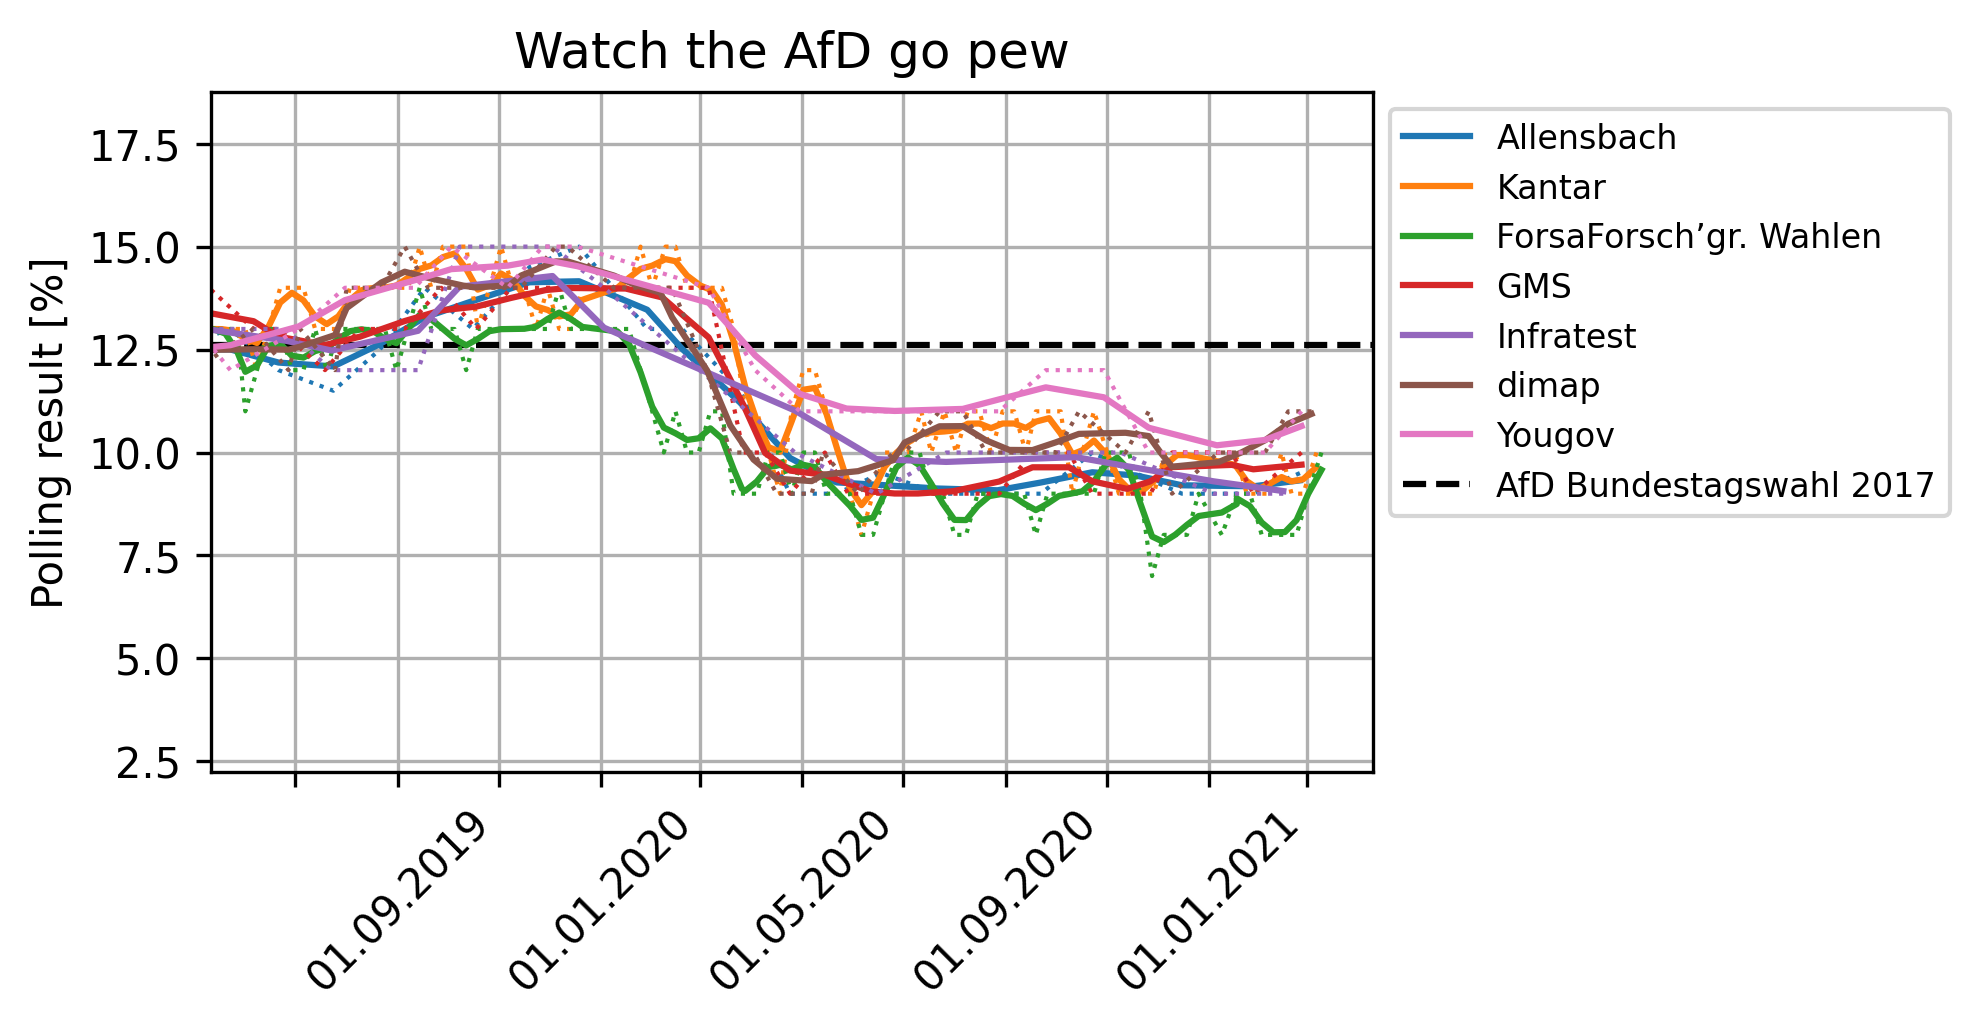

In [4]:
#hide_input
get_party_results("AfD")

---------- CDU/CSU ----------
Getting data from Allensbach ...


	Last value: 37.0%
	Last datapoint: 2021-02-25
Getting data from Kantar ...


	Last value: 32.0%
	Last datapoint: 2021-03-07
Getting data from ForsaForsch’gr. Wahlen ...


	Last value: 33.0%
	Last datapoint: 2021-03-10
Getting data from GMS ...


	Last value: 35.0%
	Last datapoint: 2021-02-26
Getting data from Infratest ...


	Last value: 37.0%
	Last datapoint: 2021-02-15
Getting data from dimap ...


	Last value: 33.0%
	Last datapoint: 2021-03-04
Getting data from Yougov ...


	Last value: 33.0%
	Last datapoint: 2021-02-26


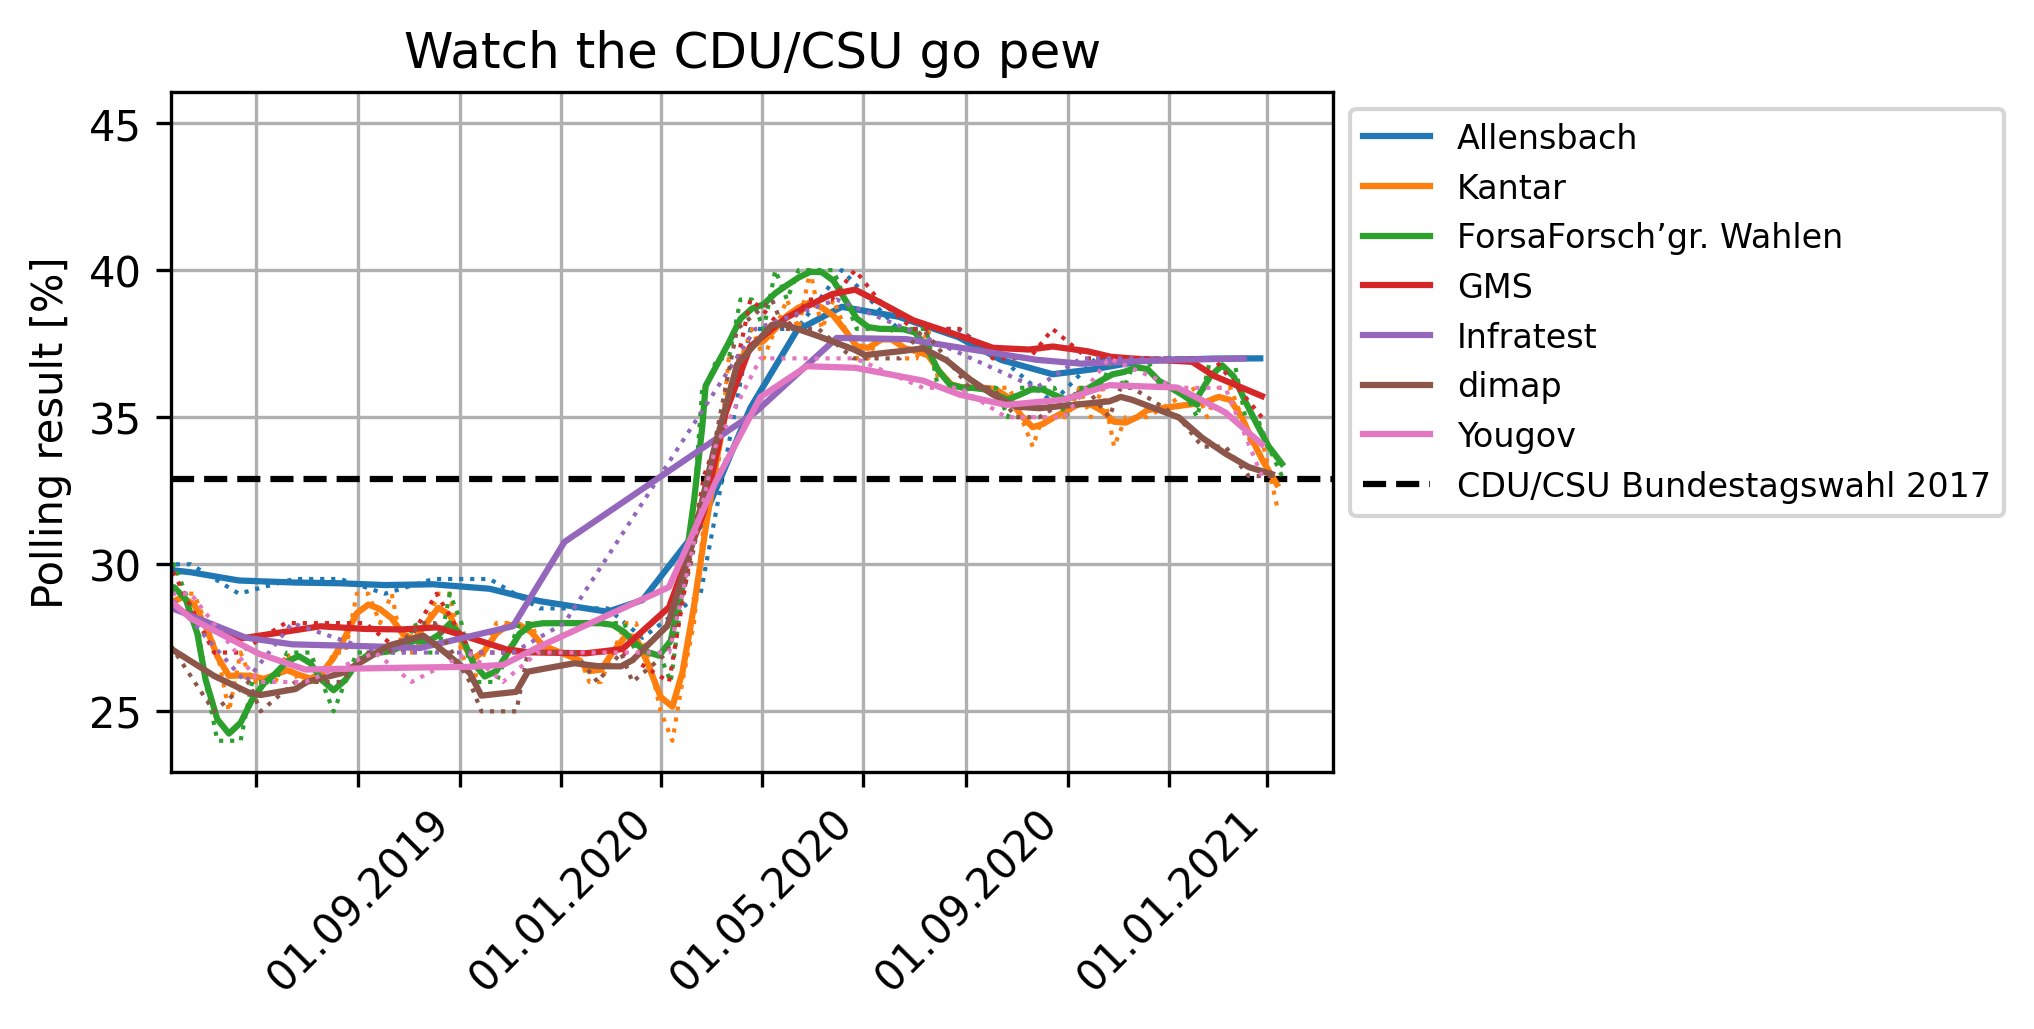

---------- SPD ----------
Getting data from Allensbach ...


	Last value: 15.0%
	Last datapoint: 2021-02-25
Getting data from Kantar ...


	Last value: 16.0%
	Last datapoint: 2021-03-07
Getting data from ForsaForsch’gr. Wahlen ...


	Last value: 16.0%
	Last datapoint: 2021-03-10
Getting data from GMS ...


	Last value: 16.0%
	Last datapoint: 2021-02-26
Getting data from Infratest ...


	Last value: 17.0%
	Last datapoint: 2021-02-15
Getting data from dimap ...


	Last value: 16.0%
	Last datapoint: 2021-03-04
Getting data from Yougov ...


	Last value: 16.0%
	Last datapoint: 2021-02-26


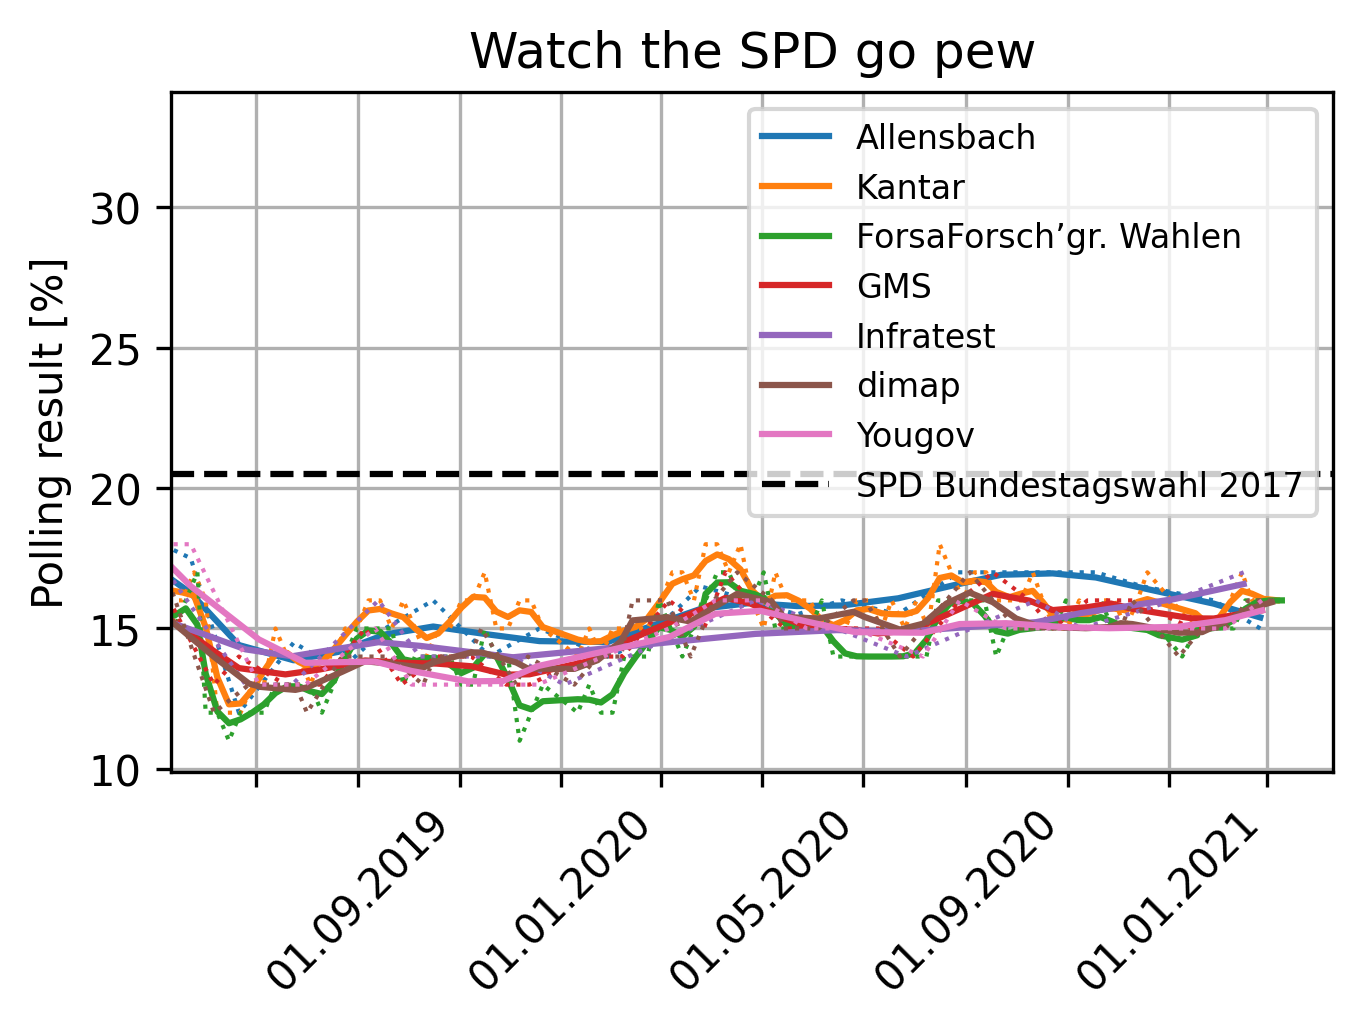

---------- GRÜNE ----------
Getting data from Allensbach ...


	Last value: 20.0%
	Last datapoint: 2021-02-25
Getting data from Kantar ...


	Last value: 19.0%
	Last datapoint: 2021-03-07
Getting data from ForsaForsch’gr. Wahlen ...


	Last value: 18.0%
	Last datapoint: 2021-03-10
Getting data from GMS ...


	Last value: 19.0%
	Last datapoint: 2021-02-26
Getting data from Infratest ...


	Last value: 18.0%
	Last datapoint: 2021-02-15
Getting data from dimap ...


	Last value: 20.0%
	Last datapoint: 2021-03-04
Getting data from Yougov ...


	Last value: 18.0%
	Last datapoint: 2021-02-26


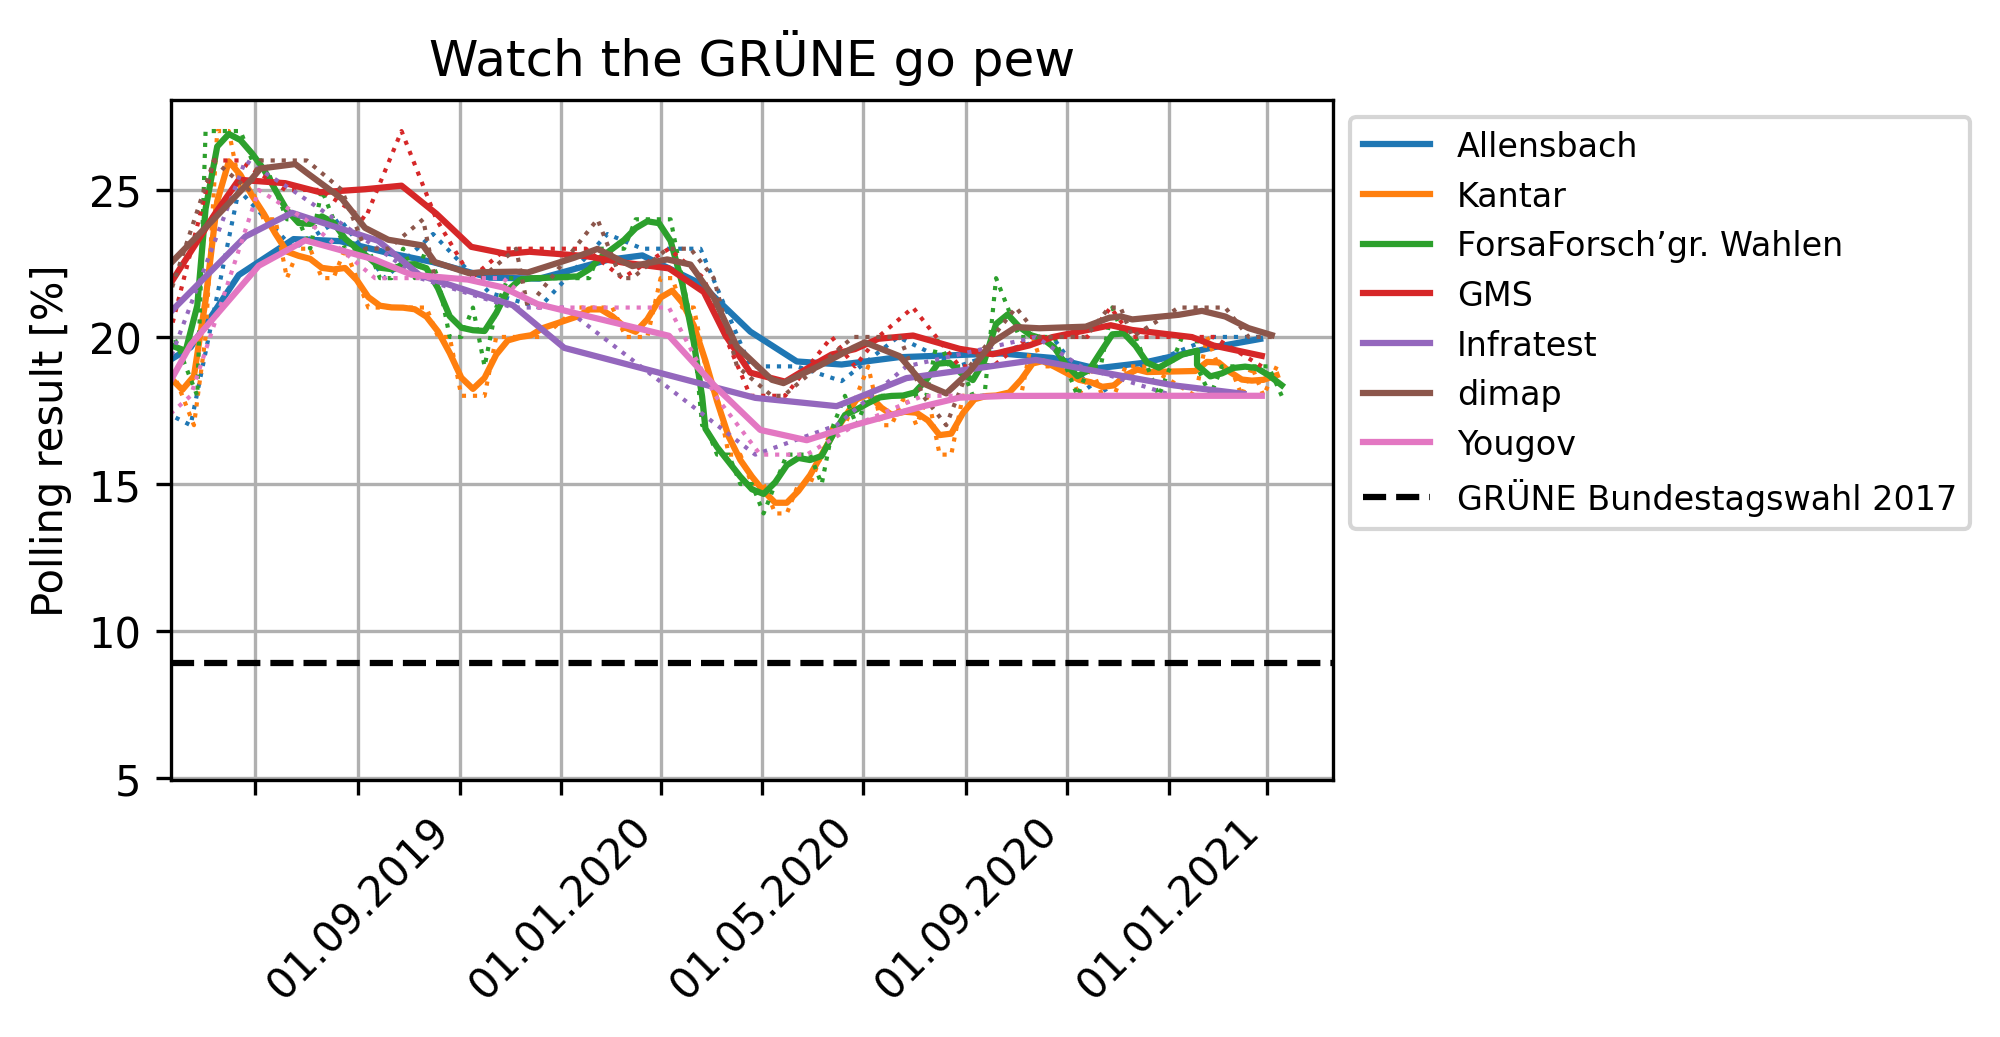

---------- FDP ----------
Getting data from Allensbach ...


	Last value: 7.0%
	Last datapoint: 2021-02-25
Getting data from Kantar ...


	Last value: 9.0%
	Last datapoint: 2021-03-07
Getting data from ForsaForsch’gr. Wahlen ...


	Last value: 8.0%
	Last datapoint: 2021-03-10
Getting data from GMS ...


	Last value: 7.0%
	Last datapoint: 2021-02-26
Getting data from Infratest ...


	Last value: 7.0%
	Last datapoint: 2021-02-15
Getting data from dimap ...


	Last value: 7.0%
	Last datapoint: 2021-03-04
Getting data from Yougov ...


	Last value: 8.0%
	Last datapoint: 2021-02-26


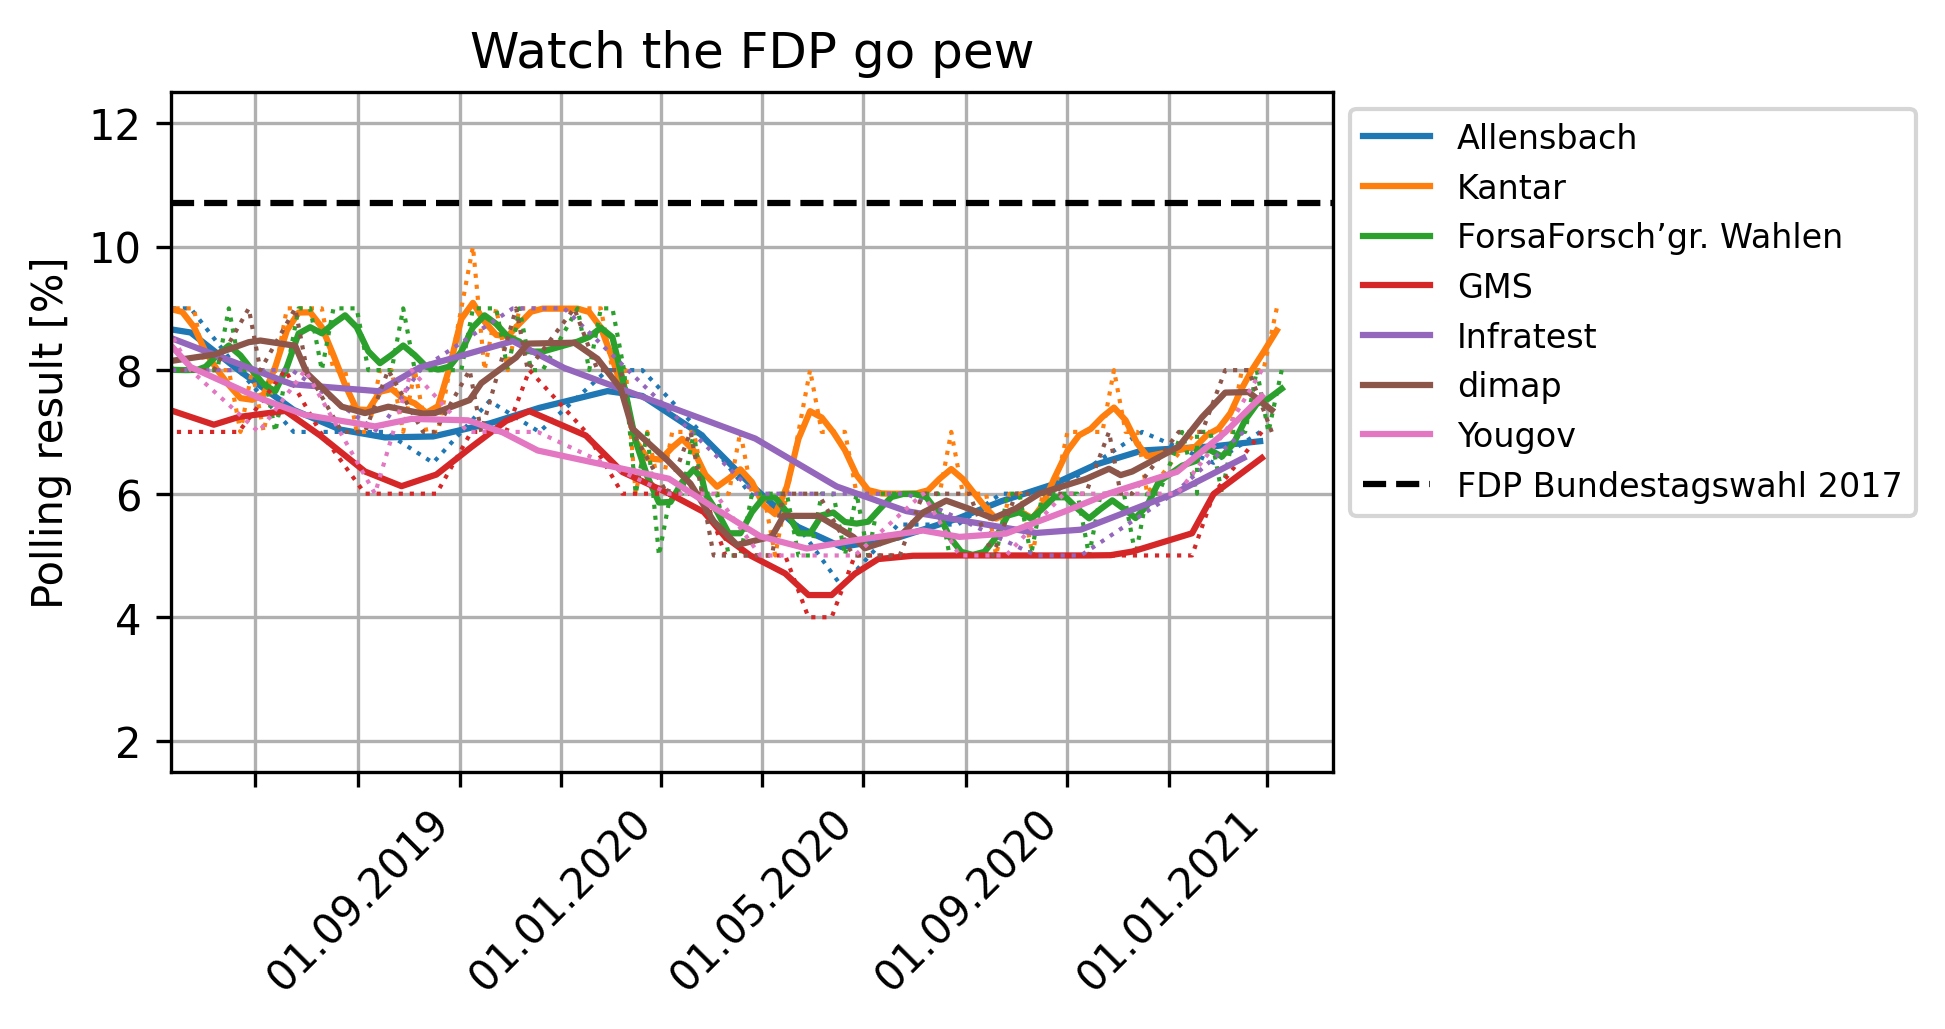

---------- DIE LINKE ----------
Getting data from Allensbach ...


	Last value: 7.0%
	Last datapoint: 2021-02-25
Getting data from Kantar ...


	Last value: 9.0%
	Last datapoint: 2021-03-07
Getting data from ForsaForsch’gr. Wahlen ...


	Last value: 8.0%
	Last datapoint: 2021-03-10
Getting data from GMS ...


	Last value: 7.0%
	Last datapoint: 2021-02-26
Getting data from Infratest ...


	Last value: 7.0%
	Last datapoint: 2021-02-15
Getting data from dimap ...


	Last value: 7.0%
	Last datapoint: 2021-03-04
Getting data from Yougov ...


	Last value: 8.0%
	Last datapoint: 2021-02-26


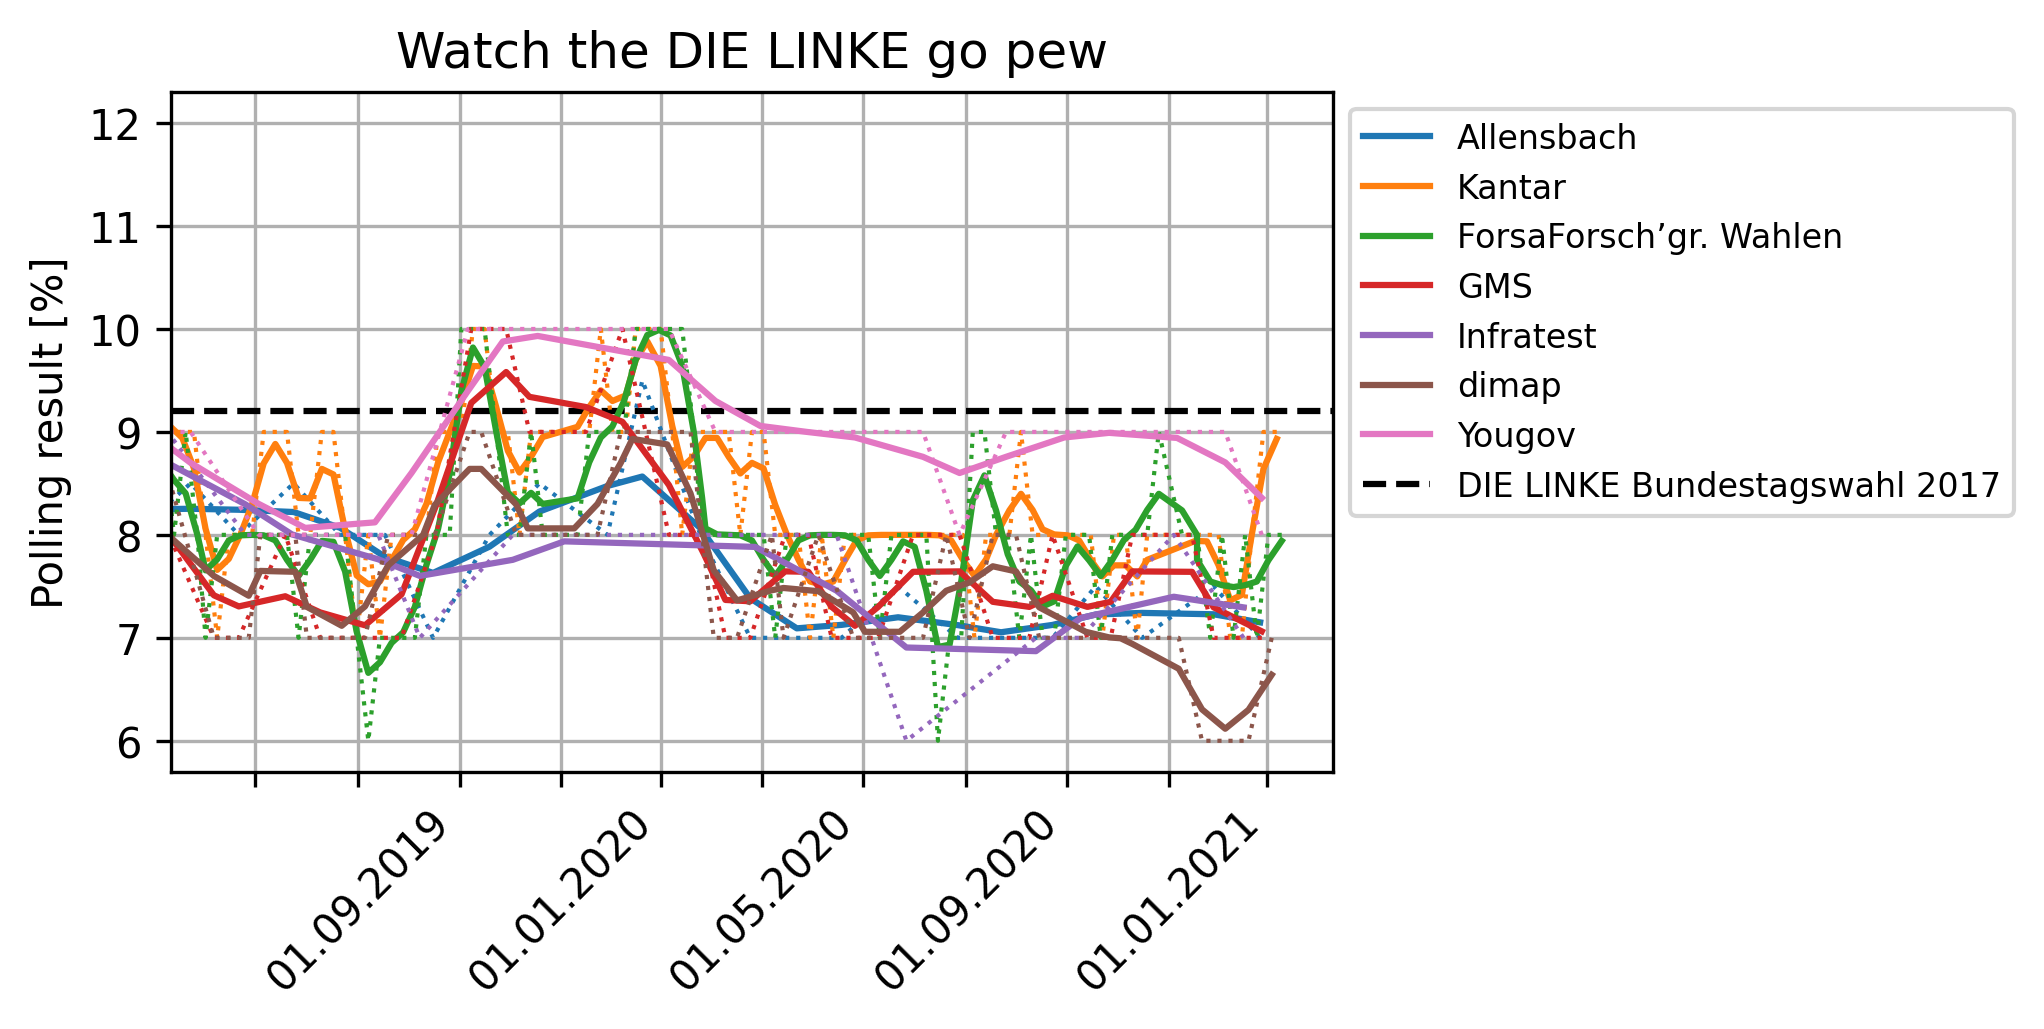

---------- AfD ----------
Getting data from Allensbach ...


	Last value: 9.5%
	Last datapoint: 2021-02-25
Getting data from Kantar ...


	Last value: 10.0%
	Last datapoint: 2021-03-07
Getting data from ForsaForsch’gr. Wahlen ...


	Last value: 10.0%
	Last datapoint: 2021-03-10
Getting data from GMS ...


	Last value: 10.0%
	Last datapoint: 2021-02-26
Getting data from Infratest ...


	Last value: 9.0%
	Last datapoint: 2021-02-15
Getting data from dimap ...


	Last value: 11.0%
	Last datapoint: 2021-03-04
Getting data from Yougov ...


	Last value: 11.0%
	Last datapoint: 2021-02-26


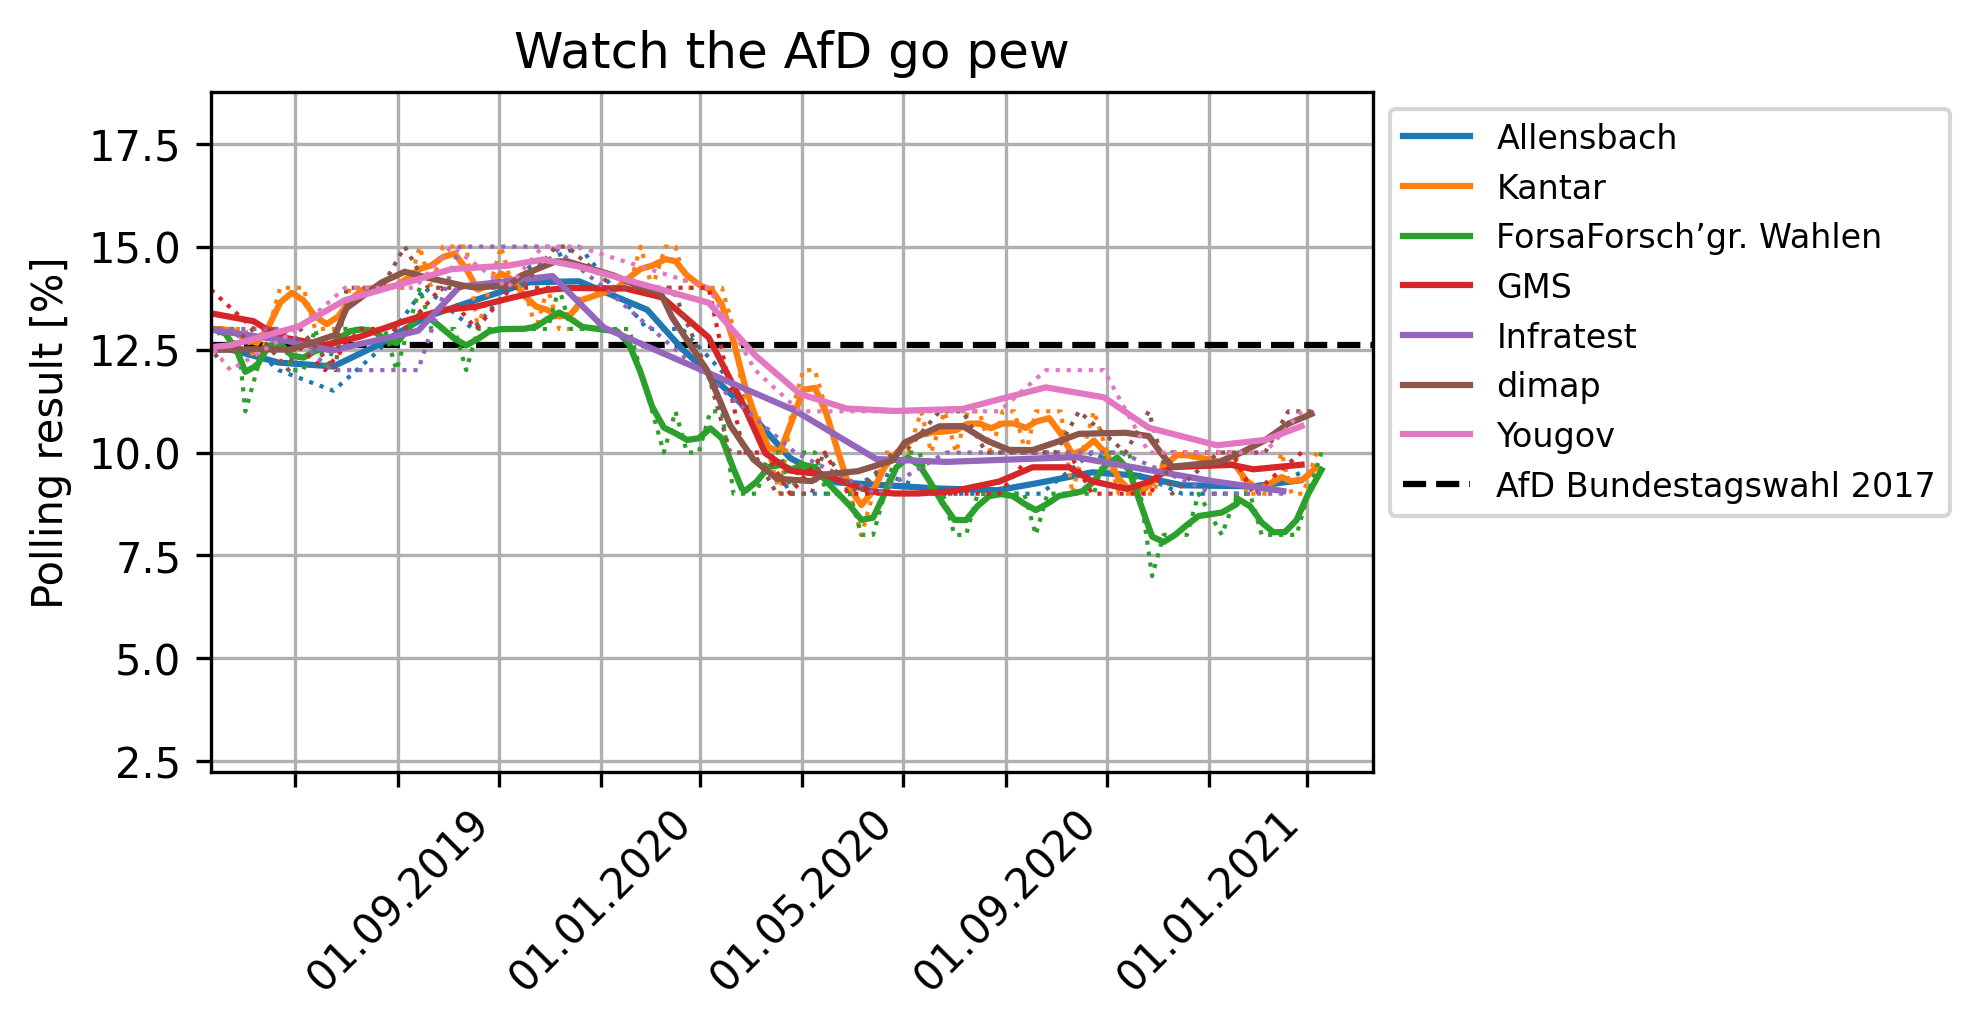

In [5]:
#hide_input
parties = [i for i in election_results.index if i not in ["Veröffentl.", 'Sonstige', 'Erhebung']]
for p in parties:
    get_party_results(p)